In [1]:
# Author: Arthur Prigent
# Email: aprigent@geomar.de

#### DATA ####
# https://downloads.psl.noaa.gov/Datasets/
from functions import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
# title: NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surface Temperature (OISST) Analysis, Version 2.1
# institution: NOAA/National Centers for Environmental Information
# source: NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/
# References: https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html
# dataset_title: NOAA Daily Optimum Interpolation Sea Surface Temperature
# version: Version 2.1
# comment: Reynolds, et al.(2007) Daily High-Resolution-Blended Analyses for Sea Surface Temperature (available at https://doi.org/10.1175/2007JCLI1824.1). Banzon, et al.(2016) A long-term record of blended satellite and in situ sea-surface temperature for climate monitoring, modeling and environmental studies (available at https://doi.org/10.5194/essd-8-165-2016). Huang et al. (2020) Improvements of the Daily Optimum Interpolation Sea Surface Temperature (DOISST) Version v02r01, submitted.Climatology is based on 1971-2000 OI.v2 SST. Satellite data: Pathfinder AVHRR SST and Navy AVHRR SST. Ice data: NCEP Ice and GSFC Ice. Data less than 15 days old may be subject to revision.
# Unlimited_Dimension: time

In [3]:
print('Last update:',str(now)[:16])

Last update: 2022-08-05 15:23


# SST anomaly relative to 1971-2000

In [4]:
sst_tmp = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.anom.2022.v2.nc',engine='pydap')
sst_oi = sst_tmp.anom[-4:,:,:]
sst_oi = xr.concat([sst_oi[:, :, 180:], sst_oi[:, :, :180]], dim='lon')
sst_oi.coords['lon'] = (sst_oi.coords['lon'] + 180) % 360 - 180

sst_tropical_atlantic = sst_oi.where((  sst_oi.lon>=-50) & (sst_oi.lon<=20) &
                           (sst_oi.lat<=10) & (sst_oi.lat>=-40),drop=True)
sst_eq_atlantic = sst_oi.where((  sst_oi.lon>=-50) & (sst_oi.lon<=20) &
                           (sst_oi.lat<=5) & (sst_oi.lat>=-5),drop=True)
sst_af_atlantic = sst_oi.where((  sst_oi.lon>=5) & (sst_oi.lon<=25) &
                           (sst_oi.lat<=10) & (sst_oi.lat>=-40),drop=True)

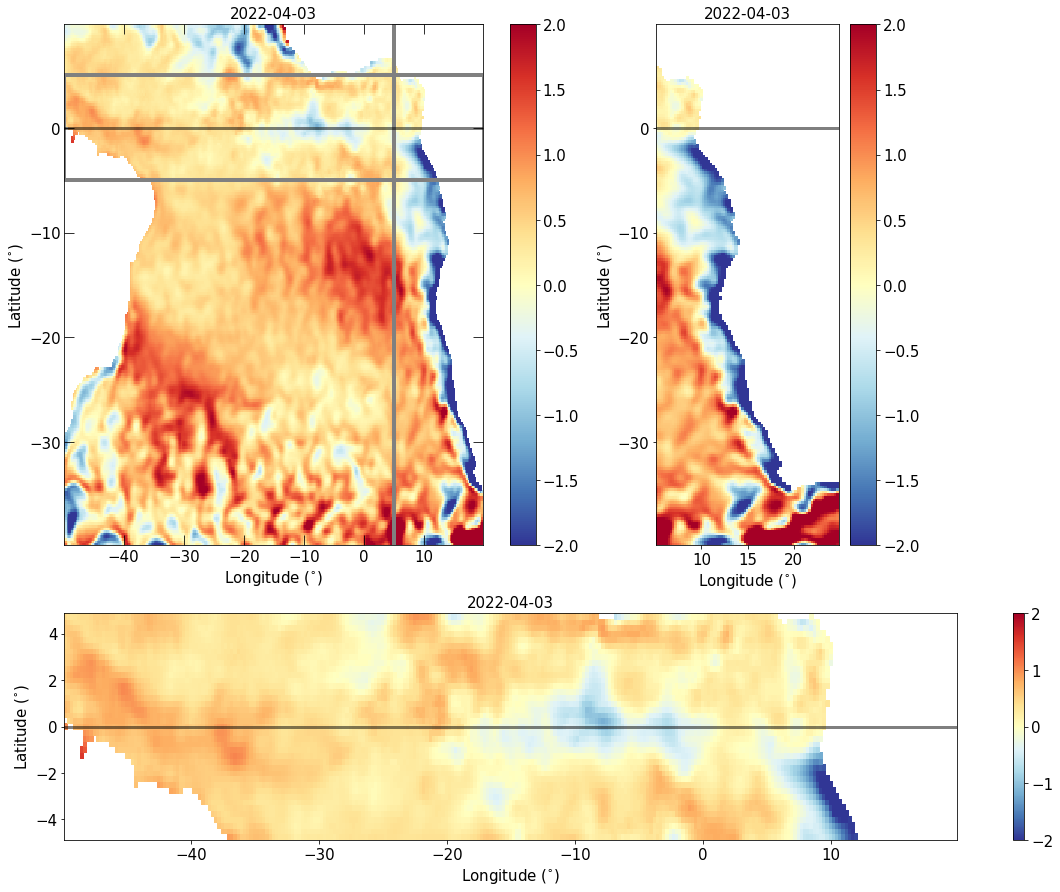

In [4]:
plot_daily_trop_map_anom(sst_tropical_atlantic[0,:,:],sst_eq_atlantic[0,:,:],sst_af_atlantic[0,:,:])

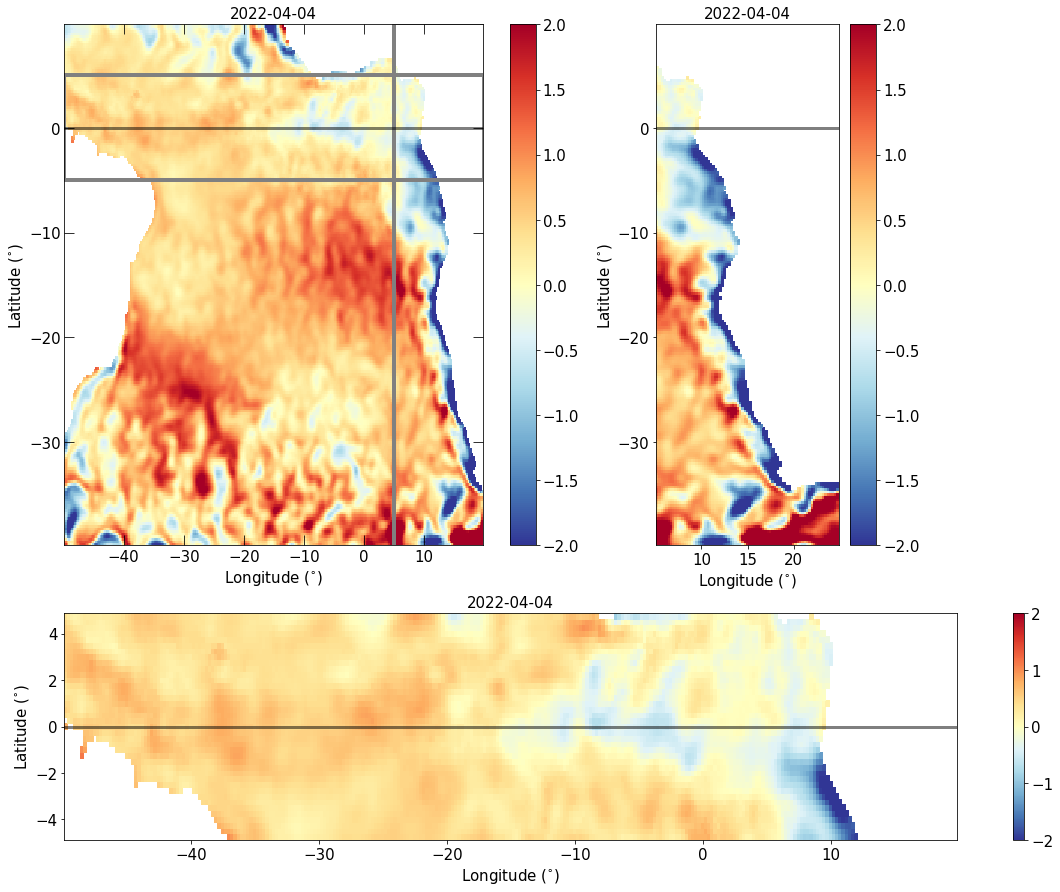

In [5]:
plot_daily_trop_map_anom(sst_tropical_atlantic[1,:,:],sst_eq_atlantic[1,:,:],sst_af_atlantic[1,:,:])

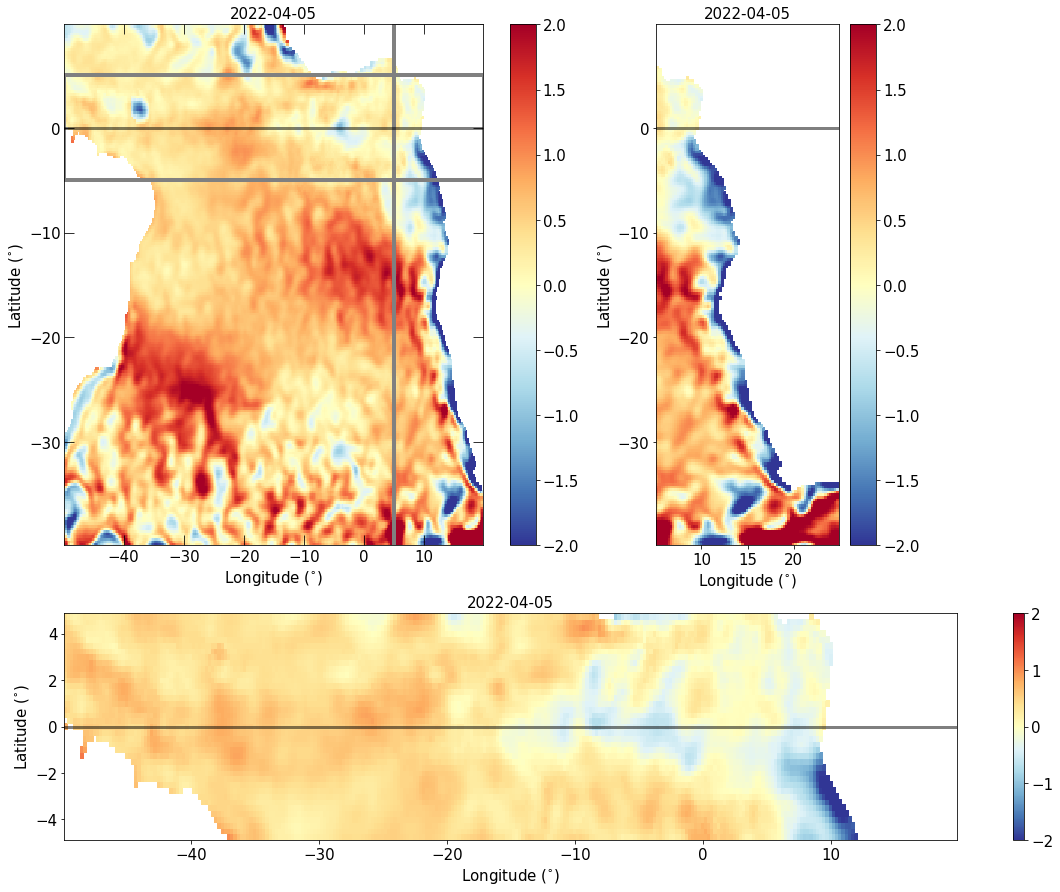

In [6]:
plot_daily_trop_map_anom(sst_tropical_atlantic[2,:,:],sst_eq_atlantic[1,:,:],sst_af_atlantic[2,:,:])

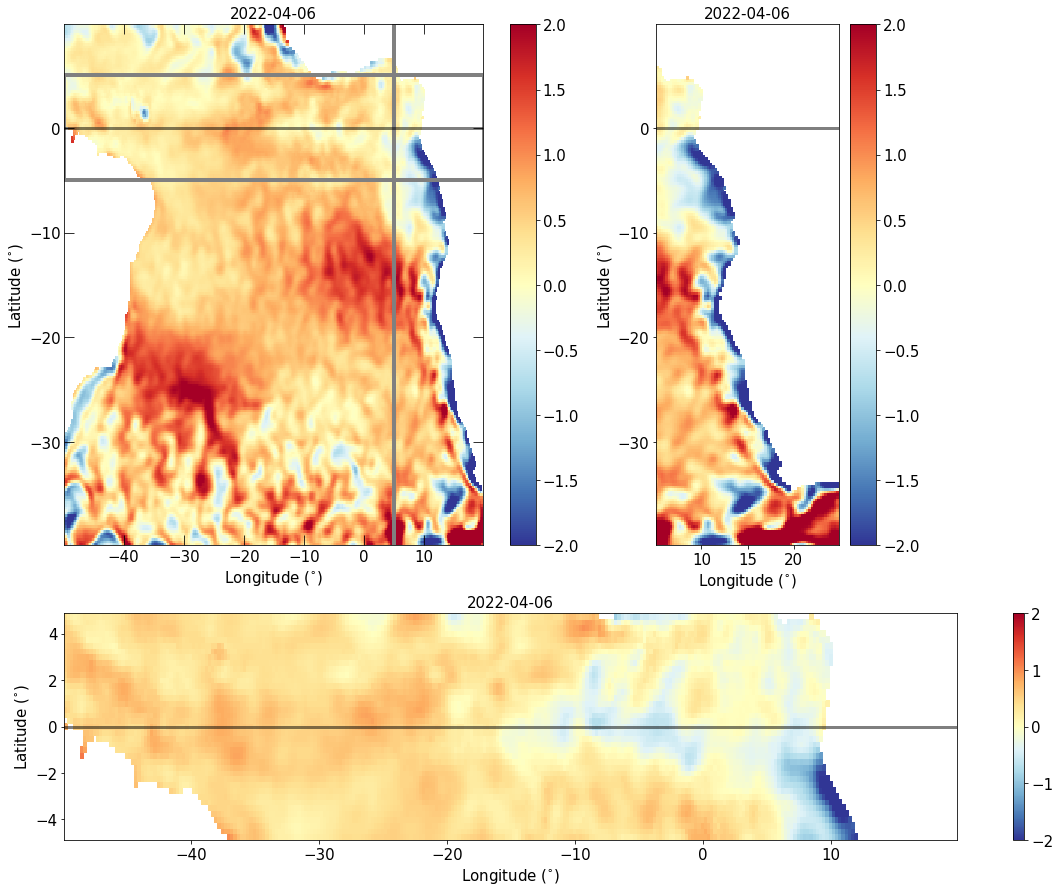

In [7]:
plot_daily_trop_map_anom(sst_tropical_atlantic[3,:,:],sst_eq_atlantic[1,:,:],sst_af_atlantic[3,:,:])

# Daily SST 

In [8]:
sst_tmp = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2022.v2.nc',engine='pydap')
sst_oi = sst_tmp.sst[-4:,:,:]
sst_oi = xr.concat([sst_oi[:, :, 180:], sst_oi[:, :, :180]], dim='lon')
sst_oi.coords['lon'] = (sst_oi.coords['lon'] + 180) % 360 - 180

sst_tropical_atlantic = sst_oi.where((  sst_oi.lon>=-50) & (sst_oi.lon<=20) &
                           (sst_oi.lat<=10) & (sst_oi.lat>=-40),drop=True)
sst_eq_atlantic = sst_oi.where((  sst_oi.lon>=-50) & (sst_oi.lon<=20) &
                           (sst_oi.lat<=5) & (sst_oi.lat>=-5),drop=True)
sst_af_atlantic = sst_oi.where((  sst_oi.lon>=5) & (sst_oi.lon<=25) &
                           (sst_oi.lat<=10) & (sst_oi.lat>=-40),drop=True)

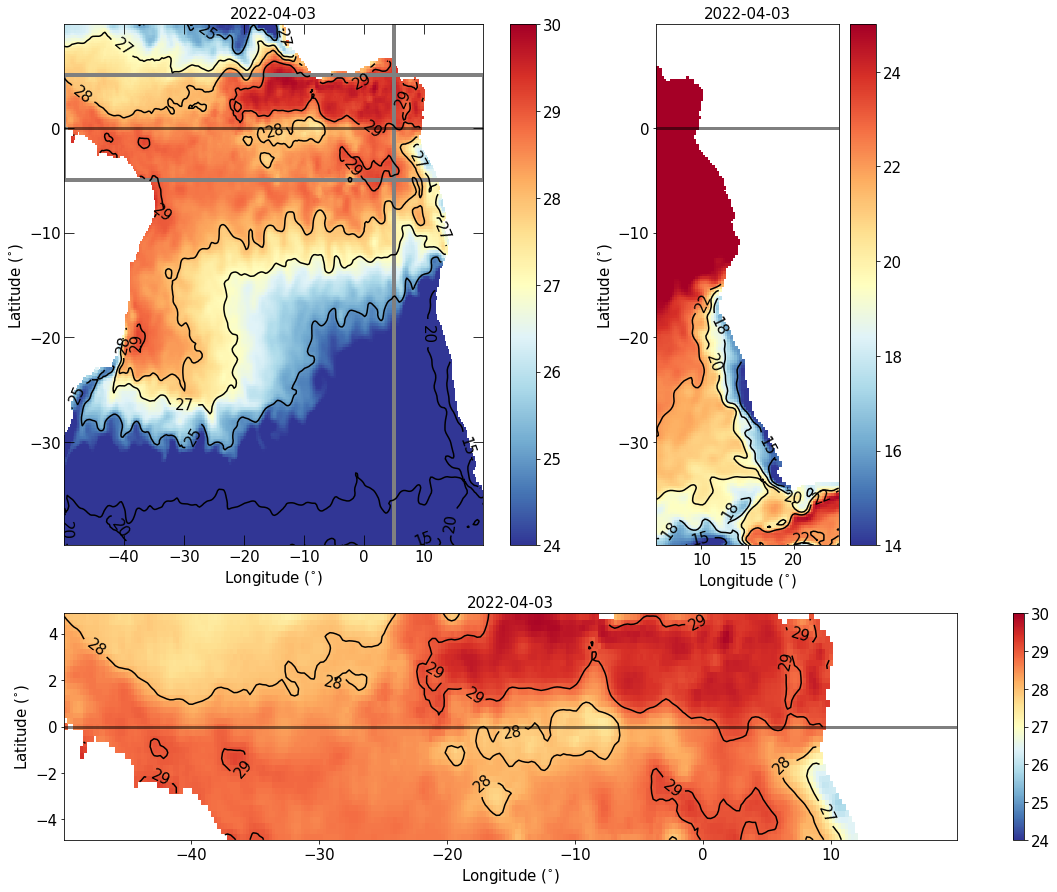

In [9]:
plot_daily_trop_map(sst_tropical_atlantic[0,:,:],sst_eq_atlantic[0,:,:],sst_af_atlantic[0,:,:])

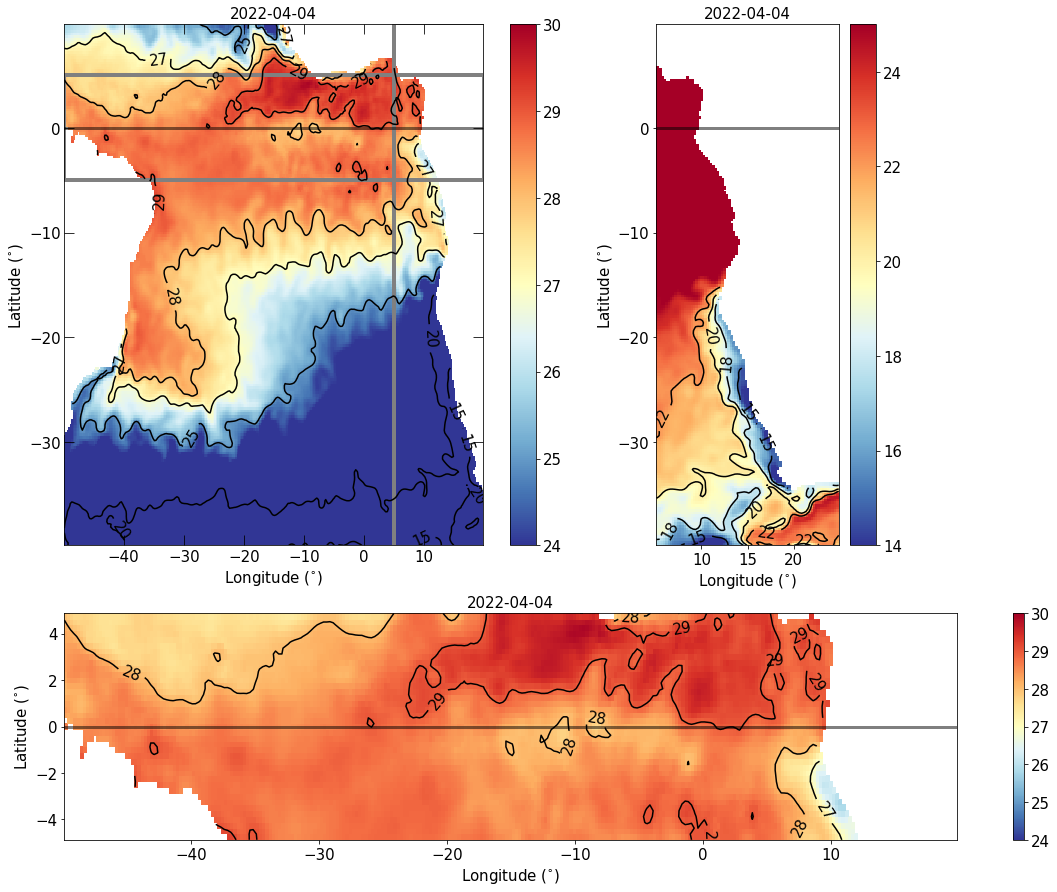

In [10]:
plot_daily_trop_map(sst_tropical_atlantic[1,:,:],sst_eq_atlantic[1,:,:],sst_af_atlantic[1,:,:])

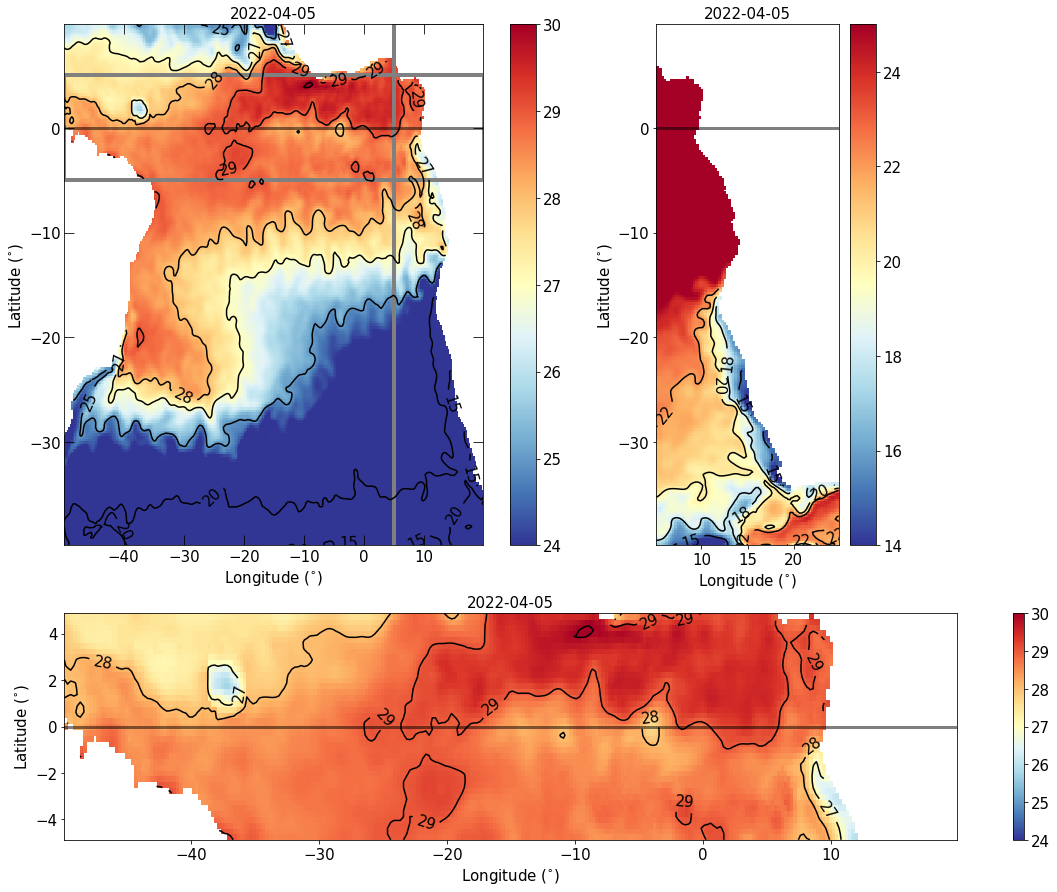

In [11]:
plot_daily_trop_map(sst_tropical_atlantic[2,:,:],sst_eq_atlantic[2,:,:],sst_af_atlantic[2,:,:])

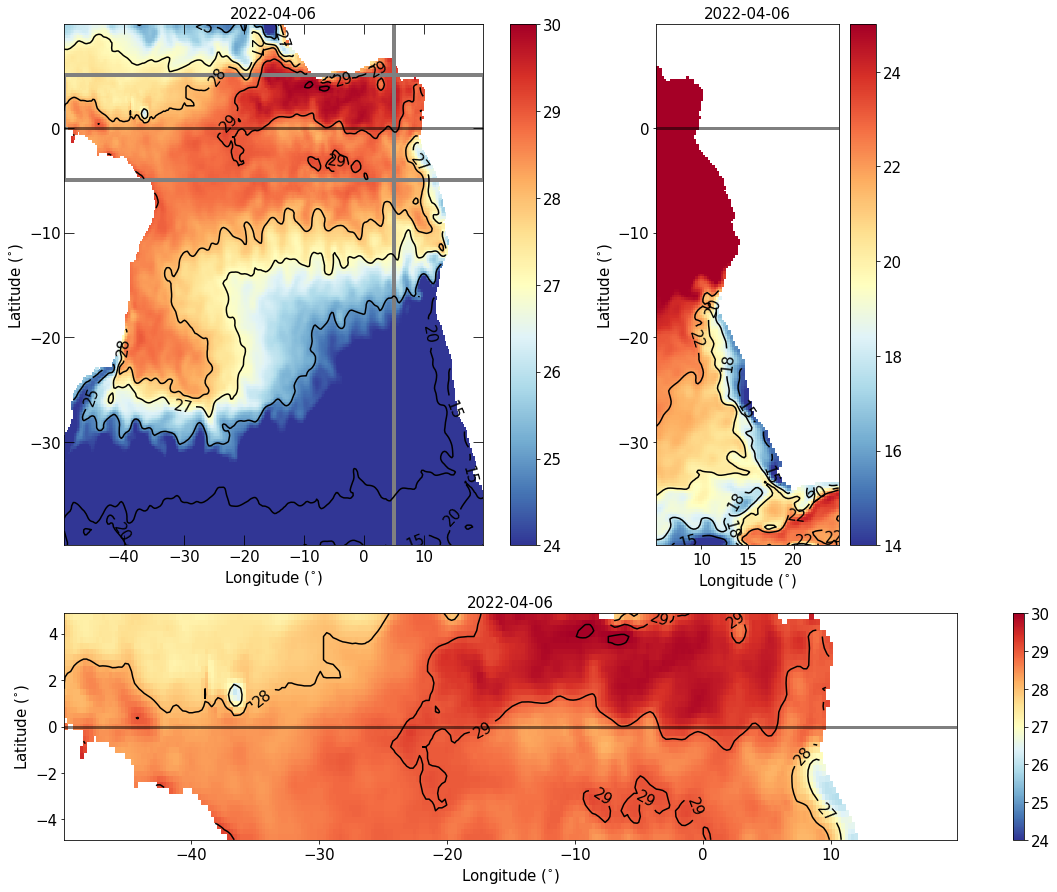

In [12]:
plot_daily_trop_map(sst_tropical_atlantic[3,:,:],sst_eq_atlantic[3,:,:],sst_af_atlantic[3,:,:])

In [7]:
sst_tmp

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 215)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-08-03
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    anom     (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.5
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    institution:                     NOAA/National Centers for Environmental ...
    source:                          NOAA/NCEI https://www.ncei.noaa.gov/data...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    version:                         Version 2.1
    comment:                         Reynolds, et al.(2007) Daily High-Resolu...
    DODS_EXTRA.Unlimited_Dimension:  time

In [4]:
def data_howmoller(path_data,now):
    
    sst_tmp = xr.open_dataset(path_data+'sst.day.anom.'+str(now.year)+'.v2.nc',engine='pydap')
    sst_oi_2_eq = sst_tmp.anom[:,300:400,:]
    del sst_tmp
    sst_oi_2_eq = xr.concat([sst_oi_2_eq[:, :, 720:], sst_oi_2_eq[:, :, :720]], dim='lon')
    sst_oi_2_eq.coords['lon'] = (sst_oi_2_eq.coords['lon'] + 180) % 360 - 180

    sst_tmp = xr.open_dataset(path_data+'sst.day.anom.'+str(now.year-1)+'.v2.nc',engine='pydap')
    sst_oi_1_eq = sst_tmp.anom[:,300:400,:]
    del sst_tmp
    sst_oi_1_eq = xr.concat([sst_oi_1_eq[:, :, 720:], sst_oi_1_eq[:, :, :720]], dim='lon')
    sst_oi_1_eq.coords['lon'] = (sst_oi_1_eq.coords['lon'] + 180) % 360 - 180

    sst_oi_all = xr.concat([sst_oi_1_eq,sst_oi_2_eq],dim='time')
    del sst_oi_2_eq,sst_oi_1_eq


    sst_eq_hov = sst_oi_all.where((  sst_oi_all.lon>=-45) & (sst_oi_all.lon<=10) &
                               (sst_oi_all.lat<=3) & (sst_oi_all.lat>=-3),drop=True)
    sst_tmp = xr.open_dataset(path_data+'sst.day.anom.'+str(now.year)+'.v2.nc',engine='pydap')
    sst_oi_2_ab = sst_tmp.anom[:,238:365,:]
    del sst_tmp
    sst_oi_2_ab = xr.concat([sst_oi_2_ab[:, :, 720:], sst_oi_2_ab[:, :, :720]], dim='lon')
    sst_oi_2_ab.coords['lon'] = (sst_oi_2_ab.coords['lon'] + 180) % 360 - 180
    
    
    sst_tmp = xr.open_dataset(path_data+'sst.day.anom.'+str(now.year-1)+'.v2.nc',engine='pydap')
    sst_oi_1_ab = sst_tmp.anom[:,238:365,:]
    del sst_tmp
    sst_oi_1_ab = xr.concat([sst_oi_1_ab[:, :, 720:], sst_oi_1_ab[:, :, :720]], dim='lon')
    sst_oi_1_ab.coords['lon'] = (sst_oi_1_ab.coords['lon'] + 180) % 360 - 180
    sst_oi_all_ab_tmp = xr.concat([sst_oi_1_ab,sst_oi_2_ab],dim='time')
    del sst_oi_2_ab,sst_oi_1_ab



    sst_ab_hov = sst_oi_all_ab.where((  sst_oi_all_ab.lon>=0) & (sst_oi_all_ab.lon<=20) &
                               (sst_oi_all_ab.lat<=0) & (sst_oi_all_ab.lat>=-30),drop=True)


    mask_1deg_tmp = np.zeros((sst_ab_hov[0,:,:].shape))
    width = 8 # 4 for 1/2 degree resolution 

    lon_test_2 = []
    lon_test_1 = []

    for i in range(mask_1deg_tmp.shape[0]):
        lon_nan = np.where(np.isnan(sst_ab_hov[0,i,:])==True)

        mask_1deg_tmp[i,lon_nan[0][0]-1-width:lon_nan[0][0]-1] = 1

    mask_1_deg  = xr.Dataset({'mask': (['lat','lon'],mask_1deg_tmp)}
                       ,coords={'lat':(np.array(sst_ab_hov.lat)),
                                 'lon':(np.array(sst_ab_hov.lon))})

    sst_ab_hov_masked = sst_ab_hov.where(mask_1_deg.mask==1)

    sst_eq_hov_mean = sst_eq_hov.mean(dim='lat')
    sst_ab_hov_masked_mean = sst_ab_hov_masked.mean(dim='lon')
    
    
    
    return sst_eq_hov_mean,sst_ab_hov_masked_mean

In [ ]:
#path_data = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/'
#sst_eq_hov_mean,sst_ab_hov_masked_mean = data_howmoller(path_data,now)

In [ ]:
def plot_hovmoller_eq_aba(sst_eq,sst_aba):
    f,ax = plt.subplots(1,2,figsize=[10,10],sharey=True)

    ax=ax.ravel()
    ftz=15
    cmap = plt.cm.RdYlBu_r
    bounds = np.arange(-2,2.2,0.2)
    cs0 = ax[0].contourf(sst_eq.lon,sst_eq.time,sst_eq,cmap=cmap,
                      levels=bounds,extend='both')

    ax[0].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
    ax[0].tick_params(labelsize=ftz)

    cs0 = ax[1].contourf(sst_aba.lat,sst_aba.time,sst_aba,cmap=cmap,
                      levels=bounds,extend='both')
    ax[1].invert_xaxis()
    ax[1].set_xlabel('Latitude ($^{\circ}$)',fontsize=ftz)
    ax[1].tick_params(labelsize=ftz)

    cbar = plt.colorbar(cs0)
    cbar.ax.tick_params(labelsize=ftz)
    cbar.set_label('($^{\circ}$C)',fontsize=ftz)

In [ ]:
#plot_hovmoller_eq_aba(sst_eq_hov_mean,sst_ab_hov_masked_mean)